In [1]:
#importação
arquivo = open('vl_p.dat','r',1,'utf-8')

In [2]:
texto = arquivo.read()

In [3]:
linhas = texto.split('\n')

In [4]:
print(linhas[0])

 VL1  1  97.073    0 18  0 49  7.534


In [5]:
entradas = []
for linha in linhas:
    entradas.append(linha.split())

In [6]:
print(entradas[0])

['VL1', '1', '97.073', '0', '18', '0', '49', '7.534']


In [7]:
dados = []
for x in entradas:
    if len(x) == 8:
        dados.append([x[0],int(x[1]),float(x[2]),int(x[3]),int(x[4]),int(x[5]),int(x[6]),float(x[7])])
    continue

In [8]:
print(dados[0])

['VL1', 1, 97.073, 0, 18, 0, 49, 7.534]


In [9]:
#descartando lixo inútil
arquivo.close()
texto = ""
linhas = []
entradas = []

In [ ]:
import pandas as pd
df=pd.DataFrame(dados,columns=[
    "spacecraftID", "vikingMissionYear",
    "logitudeAreocentr icaHora","solMarciano",
    "HoraLocalTerra24", "MinutoLocalTerra",
    "SegundoLocalTerra","PressaoMilibares"
])
#explorando
df.head()

In [11]:
df.size

1204408

In [33]:
df.describe()

,vikingMissionYear,longitudeSolarAreocentrica,solMarciano,HoraLocalTerra24,MinutoLocalTerra,SegundoLocalTerra,pressaoPascais
count,150551.000000,150551.000000,150551.000000,150551.000000,150551.000000,150551.000000,150551.000000
mean,1.618940,1.382482,520.733054,12.025845,28.719371,29.915637,819.505275
std,0.828478,1.089488,501.916311,6.893347,17.550036,17.093274,86.271486
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,651.400000
25%,1.000000,0.000000,190.000000,6.000000,14.000000,15.000000,746.900000
50%,1.000000,1.000000,395.000000,12.000000,28.000000,30.000000,813.300000
75%,2.000000,2.000000,623.000000,18.000000,44.000000,44.000000,887.600000
max,4.000000,3.000000,2245.000000,24.000000,59.000000,60.000000,1082.600000


In [29]:
#buscando valores ausentes
df.isnull().sum()

spacecraftID                  0
vikingMissionYear             0
longitudeSolarAreocentrica    0
solMarciano                   0
HoraLocalTerra24              0
MinutoLocalTerra              0
SegundoLocalTerra             0
pressaoPascais                0
dtype: int64

In [30]:
#buscando duplicatas
df.duplicated().sum()

0

In [13]:
def milibaresAPascais(mb=0):
    return mb*100

In [14]:
# Transformando milibar para pascal (Sistema Internacional de Medidas)
df['PressaoMilibares'] = df['PressaoMilibares'].apply( milibaresAPascais )

In [15]:
# en=equinócio para norte, sn=solstício para norte,
# es=equinócio para sul,   ss=solstício para sul.
def normalizarLongitudeSolarAreocentrica( lsa=0 ):
    if lsa <= 90:
        return 0
    elif lsa > 90 and lsa <=180:
        return 1
    elif lsa > 180 and lsa <=270:
        return 2
    else:
        return 3

In [16]:
df = df.rename(columns={'PressaoMilibares': 'pressaoPascais'})

In [17]:
df = df.rename(columns={'logitudeAreocentr icaHora': 'longitudeSolarAreocentrica'})

In [23]:
# normalizando campo 
df['longitudeSolarAreocentrica'] = df['longitudeSolarAreocentrica'].apply( normalizarLongitudeSolarAreocentrica )

In [31]:
df.head(1)

,spacecraftID,vikingMissionYear,longitudeSolarAreocentrica,solMarciano,HoraLocalTerra24,MinutoLocalTerra,SegundoLocalTerra,pressaoPascais
0,VL1,1,1,0,18,0,49,753.4


<Axes: >

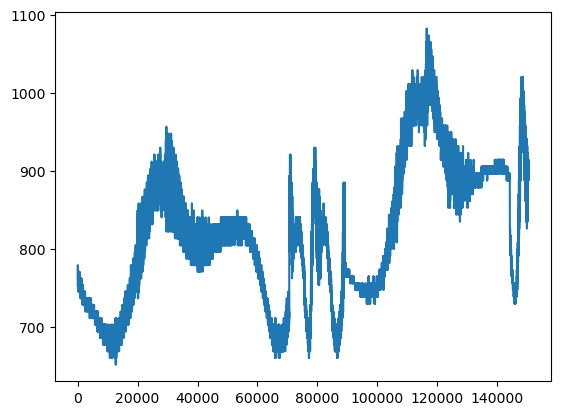

In [32]:
#plotando os dados de pressão
df['pressaoPascais'].plot(kind='line')

<Axes: >

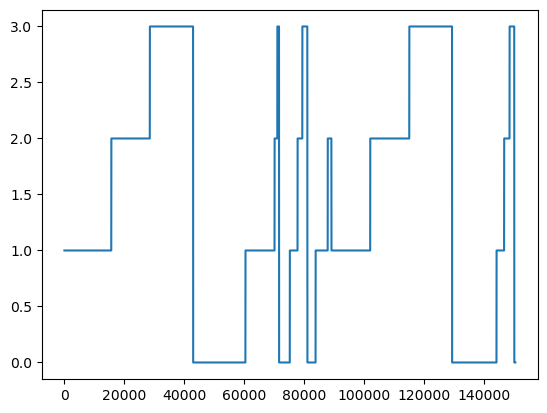

In [36]:
#plotando longitudeSolarAreocentrica
#(vulgarmente conhecida como estações do ano)
df['longitudeSolarAreocentrica'].plot(kind='line')

<Axes: xlabel='solMarciano'>

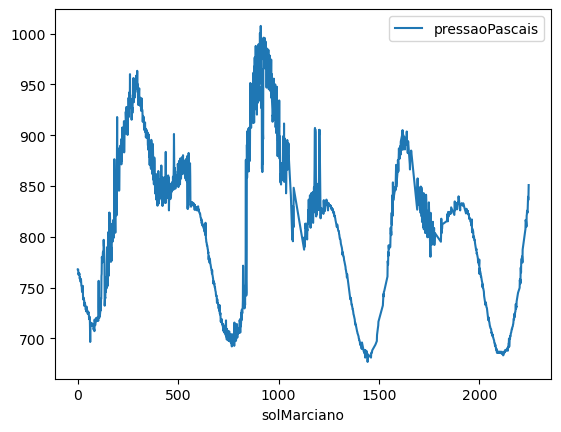

In [49]:
# plotando média de pressão atmosférica para cada sol marciano
# mescla de entradas por média de pressão.
subdfalfa=df[['solMarciano','pressaoPascais']]
subdfalfa.groupby('solMarciano').mean().plot(kind='line')

<Axes: >

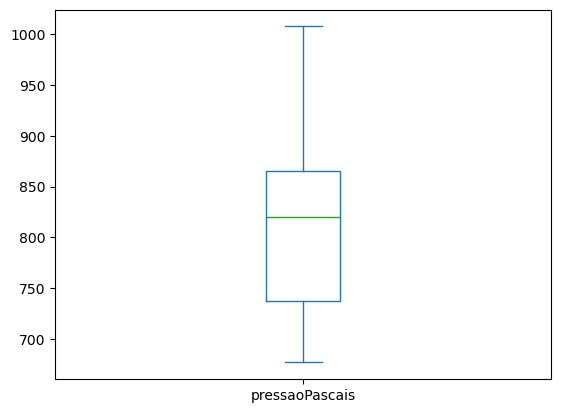

In [78]:
#buscando outliers
subdfalfa=df[['solMarciano','pressaoPascais']]
subdfalfa.groupby('solMarciano').mean().plot(kind='box')